# WeRateDogies project - Wrangling & Analyzing Twitter Data

    by Bibhash Kalita
    

## Introduction


The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.The challenges lies in the fact that the Twitter archive is great, but only contains bnasic tweet information that comes in JSON format. For creating a successful project, i need to gather and clean the Twitter data for a worthy analysis and visualization 

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather Data

In [3]:
# Read the twitter_archive_enhanced.csv file 

df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [5]:
# Programmatically download the dog image prediction files from 
# the Udacity server using Request library
import os 
import requests

# Save to a file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name, 
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)


In [6]:
#open tsv file
images = pd.read_table('image-predictions.tsv', sep='\t')


### Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file.

In [12]:
#Importing libraries
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time

# authentication
consumer_key = 'p4cy7bAIu2RMVYYLwi4mLbke4'
consumer_secret = 'uP0NzCBUf8WNej2nbFK4JOYFkK7wu8wz0IP6ddKj0QNveu4zFa'
access_token = '2774232841-ZfpxInXNkr7CHRPUEepw5HIIuUR5xAajwKhSFkh'

access_secret = '1A3Zpa49SQvO28Zk1EJ7VAaSOlIxZx4nf1ALaYR6iqyAv'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [14]:
#Twitter Query using tweet_id information from the df.
tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))


Error for: 888202515573088257
Error for: 873697596434513921
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 842892208864923648
Error for: 837012587749474308
Rate limit reached. Sleeping for: 4
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Rate limit reached. Sleeping for: 54
Rate limit reached. Sleeping for: 82


In [18]:
import json

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4)

In [19]:
tweet_df = pd.read_json('tweet_json.txt',orient='index')

## Assessing Data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2346 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2346 non-null datetime64[ns]
entities                         2346 non-null object
extended_entities                1824 non-null object
favorite_count                   2346 non-null int64
favorited                        2346 non-null int64
geo                              0 non-null float64
id                               2346 non-null int64
id_str                           2346 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

## Quality Issues

Issues with the data's content

Need to remove rows that have been retweeted, therby they are not original tweets

### A tweet thet has been retweeted

The relevant field is retweet_count. This field provides the number of times this tweet was retweeted. Note that this number may vary over time, as additional people retweet the tweet.

### A tweet that is a retweet

Want to exclude any tweet that is a retweet. Two fields are significant. First, the retweeted_status contains the source tweet (i.e., the tweet that was retweeted). The present or absence of this field can be used to identify tweets that are retweets. Second, the retweet_count is the count of the retweets of the source tweet, not this tweet.

Therefore I will isolate all rows in the retweeted_status column that have a value and delete it from the dataframe. This will remove tweets that are a retweet from the dataframe.

### DataFrame Table:

- Names of dogs are miss labelled, mispelled or missing. Cross-reference text data with Names column.
- Excluded columns from dataset that are not needed for the analysis
- 181 records have a retweeted_status_id, these will need to be exluded from the dataset

### Image predictions Table:

- p1 column: capitalize the first letter of each word, make consistent
- p2 column: capitalize the first letter of each word, make consistent
- p3 column: capitalize the first letter of each word, make consistent
- Remove the (_) between the words

### Tweet_df Table:

- rename the id column to "tweet_id" to match the other 2 tables
- 176 records have a retweeted_status, will need to be excluded

## Tidyness Issues

Issues with the structure of the data

### Dataframe Table:

- Parse the datetime information into seperate columns
- Drop columns that are not needed & rearrange column order for an easier read
- Combine each dog stage column into a single column named "stage"
- tweet_id column needs to be converted from a number to string value
- Date and Time columns need to be converted to datetime objects
- Rating columns need to be converted to float values

### Tweet_df Table:

- convert id column from a number to a string
- Reindex the tweet_df table using the tweet_id
- Change column order in the Tweet_df and the df tables for an easier read of the data
- Consolidate the tweet_df table into the following columns: tweet_id, retweet count, favorite count,text

### All Tables:

- perform an inner join between all three datasets

## Cleaning Data

In [24]:
#copy the dataframes 
df_clean = df.copy()
images_clean = images.copy()
tweet_df_clean = tweet_df.copy()

### df_clean dataframe

#### Define

Missing Data: replace faulty names or corrected names

#### Code

In [25]:
# Missing Data
# replacing faulty names with None value or corrected Name
df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("light",'None', inplace=True)
df_clean['name'].replace("life",'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("a",'None', inplace=True)
df_clean['name'].replace("by",'None', inplace=True)
df_clean['name'].replace("actually",'None', inplace=True)
df_clean['name'].replace("just",'None', inplace=True)
df_clean['name'].replace("getting",'None', inplace=True) 
df_clean['name'].replace("infuriating",'None', inplace=True) 
df_clean['name'].replace("old",'None', inplace=True) 
df_clean['name'].replace("all",'None', inplace=True) 
df_clean['name'].replace("this",'None', inplace=True) 
df_clean['name'].replace("very",'None', inplace=True) 
df_clean['name'].replace("mad",'None', inplace=True) 
df_clean['name'].replace("not",'None', inplace=True)
df_clean['name'].replace("one",'None', inplace=True)
df_clean['name'].replace("my",'None', inplace=True)
df_clean['name'].replace("O","O'Malley", inplace=True)
df_clean['name'].replace("quite","None", inplace=True)
df_clean['name'].replace("such","None", inplace=True)

#### Test


In [26]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Define

identify and exlude tweets that have a retweeted_status because the tweet is a retweet and therefore not original.

#### code

In [27]:
# Identify how many tweets are retweets by the "retweeted_status" columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
df_clean[df_clean['retweeted_status_id'].notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [29]:
# remove these values from the dataframe using the drop() function
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()== True].index,inplace=True)

#### Test

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define

Convert the timestamp column from a string to DateTime objects

#### Code

In [31]:
# DF table: Clean timestamp column
from datetime import datetime,timedelta

#what data type is the timestamp currently in?
type(df_clean['timestamp'].iloc[0])

str

In [32]:
#Use pd.to_datetime to convert the column from strings to DateTime objects.
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns 
#called Hour, Day, Month, and Year. You will create these columns based off of the timeStamp column, 
#reference the solutions if you get stuck on this step.

df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

#### Test

In [33]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23


#### Define

Combine the Dog stages into one column names "Stages"

#### Code

In [34]:
df_clean['stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

#### Test

In [35]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,07-29-2017,00:08,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,07-28-2017,16:27,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,07-28-2017,00:22,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,07-27-2017,16:25,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,07-26-2017,15:59,doggo


#### Define

Remove unwanted columns from the df_clean dataset and rearange columns for an easier read

#### code

In [36]:
# remove unwanted columns from df_clean columns
df_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

In [37]:
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,stage
0,892420643555336193,13,10,Phineas,08-01-2017,16:23,None
1,892177421306343426,13,10,Tilly,08-01-2017,00:17,None
2,891815181378084864,12,10,Archie,07-31-2017,00:18,None
3,891689557279858688,13,10,Darla,07-30-2017,15:58,None
4,891327558926688256,12,10,Franklin,07-29-2017,16:00,None


In [38]:
# Change the order (the index) of the df_clean columns
columnTitles = ['tweet_id', 
                'date', 
                'time',
                'name',
                'stage',
                'rating_numerator',
                'rating_denominator']
df_clean = df_clean.reindex(columns=columnTitles)

#### Test

In [39]:
df_clean.head()

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator
0,892420643555336193,08-01-2017,16:23,Phineas,None,13,10
1,892177421306343426,08-01-2017,00:17,Tilly,None,13,10
2,891815181378084864,07-31-2017,00:18,Archie,None,12,10
3,891689557279858688,07-30-2017,15:58,Darla,None,13,10
4,891327558926688256,07-29-2017,16:00,Franklin,None,12,10


#### Define

tweet_id column should be objects (i.e. how pandas represents strings), not integers or floats because it is not numeric. Update this field to strings

#### Code

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
date                  2175 non-null object
time                  2175 non-null object
name                  2175 non-null object
stage                 2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


In [41]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

#### Test

In [42]:
type(df_clean['tweet_id'].iloc[0])

str

#### Define

Date and Time columns should be datetime objects to easily perform time-related calculations.

#### Code

In [43]:
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['time'] = pd.to_datetime(df_clean['time'])

#### Test

In [44]:
type(df_clean['date'].iloc[0])
type(df_clean['time'].iloc[0])

pandas._libs.tslib.Timestamp

#### Define

rating_numerator and rating_denominator field needs to be converted to float as there is nothing stopping future dog ratings from having a number with a decimal.

#### Code

In [45]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

#### Test


In [46]:
type(df_clean['rating_numerator'].iloc[0])

numpy.float64

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
name                  2175 non-null object
stage                 2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 135.9+ KB


## Tweet_df_clean dataframe

#### Define

Rename the "id" column to "tweet_id" to match the other 2 datasets


#### Code

In [48]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [49]:
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [50]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'tweet_id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

#### Define

convert tweet_id column from a number to a string value



#### Code

In [51]:
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

#### Test

In [52]:
type(df_clean['tweet_id'].iloc[0])

str

#### Define

Identify and exlude tweets that have a retweeted_status because the tweet is a retweet and therefore not original.

#### Code

In [53]:
# Identify how many tweets are retweets by the "retweeted_status" columns
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2346 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2346 non-null datetime64[ns]
entities                         2346 non-null object
extended_entities                1824 non-null object
favorite_count                   2346 non-null int64
favorited                        2346 non-null int64
geo                              0 non-null float64
tweet_id                         2346 non-null object
id_str                           2346 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2

In [54]:
#Single out the non-null values in the 'retweet_status' column
tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()==True]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-26 06:48:02.905632768,NaN,NaN,2015-11-20 03:51:47,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,0,0,NaN,667550882905632768,667550882905632768,...,NaN,NaN,NaN,33,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-26 06:48:24.950915073,NaN,NaN,2015-11-20 03:51:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/ua...,0,0,NaN,667550904950915072,667550904950915072,...,NaN,NaN,NaN,35,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,0,"{'contributors_enabled': False, 'created_at': ..."
1992-07-24 17:26:49.858043904,NaN,NaN,2016-03-21 19:31:59,"{'hashtags': [{'indices': [61, 73], 'text': 'L...",{'media': [{'display_url': 'pic.twitter.com/j6...,0,0,NaN,711998809858043904,711998809858043904,...,NaN,NaN,NaN,137,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-07-28 05:05:15.802583040,NaN,NaN,2016-06-17 16:01:16,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,743835915802583040,743835915802583040,...,NaN,NaN,NaN,2327,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,0,"{'contributors_enabled': False, 'created_at': ..."
1993-08-28 07:04:05.350707200,NaN,NaN,2016-06-25 01:52:36,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,746521445350707200,746521445350707200,...,NaN,NaN,NaN,1090,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-09-05 15:18:28.580548608,NaN,NaN,2016-06-27 01:37:04,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,747242308580548608,747242308580548608,...,NaN,NaN,NaN,3199,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-03 06:49:54.570878976,NaN,NaN,2016-07-11 01:11:51,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'additional_media_info': {'monetiz...,0,0,NaN,752309394570878976,752309394570878976,...,NaN,NaN,NaN,18611,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-07 19:52:24.171524096,NaN,NaN,2016-07-12 03:11:42,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,0,0,NaN,752701944171524096,752701944171524096,...,NaN,NaN,NaN,3226,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-14 17:37:14.498793472,NaN,NaN,2016-07-13 18:42:44,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,753298634498793472,753298634498793472,...,NaN,NaN,NaN,6481,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-12-02 23:27:21.593970688,NaN,NaN,2016-07-

Notice, if a tweet was retweeted, there with be a "RT @" in the text.

In [56]:
#remove the tweets that are retweets from the dataset
tweet_df_clean.drop(tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()== True].index,inplace=True)

#### Test

In [57]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2175 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2175 non-null datetime64[ns]
entities                         2175 non-null object
extended_entities                1749 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null int64
geo                              0 non-null float64
tweet_id                         2175 non-null object
id_str                           2175 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2

#### Define

remove unwanted columns from the dataframe

#### Code

In [58]:
tweet_df_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)

#### Test

In [59]:
tweet_df_clean.head(10)

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2520,666020888022790144,519,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,131,666029285002620928,48,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,126,666033412701032448,46,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,304,666044226329800704,142,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,109,666049248165822464,40,Here we have a 1949 1st generation vulpix. Enj...
1991-02-08 22:05:58.794694657,133,666050758794694656,59,This is a truly beautiful English Wilson Staff...
1991-02-08 22:24:13.826850816,1237,666051853826850816,863,This is an odd dog. Hard on the outside but lo...
1991-02-08 23:25:25.042405380,443,666055525042405376,258,Here is a Siberian heavily armored polar bear ...
1991-02-08 23:51:30.499244032,300,666057090499244032,143,My oh my. This is a rare blond Canadian terrie...
1991-02-09 00:16:40.524156928,114,666058600524156928,58,Here is the Rand Paul of retrievers folks! He'...


## Image Predictions dataFrame

#### Define

Replace the underscore in the p1,p2,p3 columns

#### Code

In [60]:
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ')

#### Test

In [61]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Make the text consistent and pretty

#### Code

In [62]:
images_clean['p1'] = images_clean['p1'].str.title()
images_clean['p2'] = images_clean['p2'].str.title()
images_clean['p3'] = images_clean['p3'].str.title()

#### Test

In [63]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define 

Convert "tweet_id" column to string value

#### Code

In [64]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

#### Test

In [65]:
type(images_clean['tweet_id'].iloc[0])

str

#### Define

Use an inner join to combine the datasets together into a single dataframe

#### Code

In [66]:
df_merge = pd.merge(df_clean, tweet_df_clean,on='tweet_id', how='inner')

In [67]:
df_merge = pd.merge(df_merge, images_clean,on='tweet_id', how='inner')

#### Test

In [68]:
df_merge

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,2017-07-31,2018-03-10 00:18:00,Archie,None,12.0,10.0,25220,4233,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,2017-07-30,2018-03-10 15:58:00,Darla,None,13.0,10.0,42429,8777,This is Darla. She commenced a snooze mid meal...,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,2017-07-29,2018-03-10 16:00:00,Franklin,None,12.0,10.0,40585,9557,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,2017-07-29,2018-03-10 00:08:00,None,None,13.0,10.0,20358,3170,Here we have a majestic great white breaching ...,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,2017-07-28,2018-03-10 00:22:00,None,None,13.0,10.0,66016,19221,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
5,890609185150312448,2017-07-27,2018-03-10 16:25:00,Zoey,None,13.0,10.0,27951,4331,This is Zoey. She doesn't want to be one of th...,...,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
6,890006608113172480,2017-07-26,2018-03-10 00:31:00,Koda,None,13.0,10.0,30849,7457,This is Koda. He is a South Australian decksha...,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True
7,889638837579907072,2017-07-25,2018-03-10 00:10:00,Ted,None,12.0,10.0,27368,4619,This is Ted. He does his best. Sometimes that'...,...,1,French Bulldog,0.991650,True,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True
8,889278841981685760,2017-07-24,2018-03-10 00:19:00,Oliver,None,13.0,10.0,25459,5534,This is Oliver. You're witnessing one of his m...,...,1,Whippet,0.626152,True,Borzoi,0.194742,True,Saluki,0.027351,True
9,888917238123831296,2017-07-23,2018-03-10 00:22:00,Jim,None,12.0,10.0,29284,4579,This is Jim. He found a fren. Taught him how t...,...,1,Golden Retriever,0.714719,True,Tibetan Mastiff,0.120184,True,Labrador Retriever,0.105506,True


#### Define

Fix the "Date & Time" columns in the new df_merge dataframe.

- rearrange the Date: month-day-year
- drop the date info from the Time column

#### Code

In [69]:
df_merge['date'] = df_merge['date'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_merge['time'] = df_merge['time'].apply(lambda time: time.strftime('%H:%M'))

#### Test

In [70]:
df_merge

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,25220,4233,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,42429,8777,This is Darla. She commenced a snooze mid meal...,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,40585,9557,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,07-29-2017,00:08,None,None,13.0,10.0,20358,3170,Here we have a majestic great white breaching ...,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,07-28-2017,00:22,None,None,13.0,10.0,66016,19221,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
5,890609185150312448,07-27-2017,16:25,Zoey,None,13.0,10.0,27951,4331,This is Zoey. She doesn't want to be one of th...,...,1,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
6,890006608113172480,07-26-2017,00:31,Koda,None,13.0,10.0,30849,7457,This is Koda. He is a South Australian decksha...,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True
7,889638837579907072,07-25-2017,00:10,Ted,None,12.0,10.0,27368,4619,This is Ted. He does his best. Sometimes that'...,...,1,French Bulldog,0.991650,True,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True
8,889278841981685760,07-24-2017,00:19,Oliver,None,13.0,10.0,25459,5534,This is Oliver. You're witnessing one of his m...,...,1,Whippet,0.626152,True,Borzoi,0.194742,True,Saluki,0.027351,True
9,888917238123831296,07-23-2017,00:22,Jim,None,12.0,10.0,29284,4579,This is Jim. He found a fren. Taught him how t...,...,1,Golden Retriever,0.714719,True,Tibetan Mastiff,0.120184,True,Labrador Retriever,0.105506,True


# Store, Analyze and Visualize Data 

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.


## Store the Cleaned DataFrames

In [71]:
# Save to a file
folder_name = 'Final_Documents'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
df_clean.to_csv('Final_Documents/twitter_archive_master.csv')
images_clean.to_csv('Final_Documents/image_prediction_master.csv')
tweet_df_clean.to_csv('Final_Documents/tweet_query_master.csv')
df_merge.to_csv('Final_Documents/final_master.csv')

# Analyze

In [74]:
# Read in the updated dataframes
df_master= pd.read_csv("Final_Documents/final_master.csv", encoding="ISO-8859-1")
image_pred_df = pd.read_csv("Final_Documents/image_prediction_master.csv", encoding="ISO-8859-1")

#### Let's look at the Cleaned DataFrames 

In [75]:
df_master.head()

,Unnamed: 0,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,25220,4233,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,1,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,42429,8777,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,2,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,40585,9557,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,3,891087950875897856,07-29-2017,00:08,None,None,13.0,10.0,20358,3170,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,4,890729181411237888,07-28-2017,00:22,None,None,13.0,10.0,66016,19221,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


In [76]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 22 columns):
Unnamed: 0            1300 non-null int64
tweet_id              1300 non-null int64
date                  1300 non-null object
time                  1300 non-null object
name                  1300 non-null object
stage                 1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null float64
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null fl

#### Define

- drop the "unnamed : 0" column
- convert the "tweet_id" column to str

#### Code

In [77]:
df_master.drop(['Unnamed: 0'],axis=1,inplace=True)

In [79]:
df_master.tweet_id = df_master.tweet_id.astype(str)

#### Test

In [80]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 21 columns):
tweet_id              1300 non-null object
date                  1300 non-null object
time                  1300 non-null object
name                  1300 non-null object
stage                 1300 non-null object
rating_numerator      1300 non-null float64
rating_denominator    1300 non-null float64
favorite_count        1300 non-null int64
retweet_count         1300 non-null int64
text                  1300 non-null object
jpg_url               1300 non-null object
img_num               1300 non-null int64
p1                    1300 non-null object
p1_conf               1300 non-null float64
p1_dog                1300 non-null bool
p2                    1300 non-null object
p2_conf               1300 non-null float64
p2_dog                1300 non-null bool
p3                    1300 non-null object
p3_conf               1300 non-null float64
p3_dog                1300 non-null

#### Descriptive Statistical Analysis

In [81]:
# Descriptive statistics
print('\n')
print("Descriptive statistics of the dataset:")
stats= df_master.drop(['tweet_id'], axis=1)

stats.describe()



Descriptive statistics of the dataset:


,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1.300000e+03,1.300000e+03
mean,12.843077,10.545385,8343.098462,2554.071538,1.186923,0.587045,1.371542e-01,6.144363e-02
std,51.127955,7.871481,11501.194473,4074.587551,0.540562,0.273533,1.018995e-01,5.200750e-02
min,1.000000,2.000000,80.000000,13.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1732.750000,592.500000,1.000000,0.354718,5.440723e-02,1.649338e-02
50%,11.000000,10.000000,3869.000000,1281.000000,1.000000,0.579762,1.203825e-01,4.961540e-02
75%,12.000000,10.000000,10358.750000,3029.250000,1.000000,0.836836,1.987905e-01,9.470035e-02
max,1776.000000,170.000000,123666.000000,61712.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


#### Key Points:

- The neural network performed the best on the 1st iteration with a mean prediciton of 0.587
- Mean rating for a dog was 12.843/10 with an outlier of 1776/10
- Mean retweet count for an original tweet was 2554 and a maximum value of 61712.
- Mean favorite count for an original tweet was 8343 and a maximum value of 123666.

#### Questions

is the most popular tweet, which has a maximum favorite count of 123067, the same tweet with the highest retweet count of 61900?

Investigate the rating_numerator outlier further. What can we learn from it?

####  Define

Explore the rating_numerator outlier

#### Code

In [82]:
df_master[df_master['rating_numerator']==1776]

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
452,749981277374128128,07-04-2016,15:00,Atticus,None,1776.0,10.0,5544,2730,This is Atticus. He's quite simply America af....,...,1,Bow Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


In [83]:
#Let's pull his picture the dataset
df_master[df_master['tweet_id']==749981277374128128].jpg_url

Series([], Name: jpg_url, dtype: object)

#### Results

Turns out the outlier in the rating_numerator data is an awesome dog named Atticus who loves celebrating America's birthday!

#### Define

- Who has the most favorited dog?
- What does their picture look like?
- Does this dog also have the most retweets?

In [85]:
df_master[df_master["favorite_count"]== 123666]


,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
232,807106840509214720,12-09-2016,06:17,Stephan,None,13.0,10.0,123666,61712,This is Stephan. He just wants to help. 13/10 ...,...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True


In [86]:
#Let's pull his picture the dataset
df_master[df_master['tweet_id']==807106840509214720].jpg_url

Series([], Name: jpg_url, dtype: object)

#### Reults

The same dog has both the highest favorite and retweet count! His name is Stephan and I think the neural network predicted it right, he looks to be a Chihuahua mix!

#### Define

- what are the top 5 most popular dog names ?

#### Code

In [87]:
# What are the top 5 most common dog names?
from collections import Counter

x = df_master['name']

count = Counter(x)
count.most_common(5)

[('None', 434), ('Oliver', 8), ('Winston', 7), ('Tucker', 7), ('Penny', 6)]

#### Results

Top dog names are Oliver, Winston, Tucker and Penny

#### Define
What is the most common dog rating?


#### Code

In [88]:
x = df_master['rating_numerator']
count = Counter(x)
count.most_common()

[(10.0, 304),
 (12.0, 288),
 (11.0, 249),
 (13.0, 157),
 (9.0, 96),
 (8.0, 64),
 (7.0, 35),
 (6.0, 22),
 (5.0, 19),
 (14.0, 18),
 (3.0, 13),
 (4.0, 13),
 (2.0, 5),
 (1.0, 4),
 (24.0, 1),
 (75.0, 1),
 (27.0, 1),
 (165.0, 1),
 (1776.0, 1),
 (204.0, 1),
 (45.0, 1),
 (60.0, 1),
 (44.0, 1),
 (143.0, 1),
 (144.0, 1),
 (88.0, 1),
 (420.0, 1)]

#### Results

Most common Dog Rating is 10 with 304 instances

#### Define 

Explore the dogs with the lowest dog rating

#### Code

In [89]:
#Lets take a look at the lowest rated dogs 
df_master[df_master['rating_numerator']==1]

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
966,675153376133427200,12-11-2015,03:21,None,None,1.0,10.0,6677,2843,What kind of person sends in a picture without...,...,1,Paper Towel,0.327957,False,Mailbox,0.096027,False,Seat Belt,0.034995,False
1235,667549055577362432,11-20-2015,03:44,None,None,1.0,10.0,6027,2419,Never seen dog like this. Breathes heavy. Tilt...,...,1,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False
1287,666287406224695296,11-16-2015,16:11,None,None,1.0,2.0,151,68,This is an Albanian 3 1/2 legged Episcopalian...,...,1,Maltese Dog,0.857531,True,Toy Poodle,0.063064,True,Miniature Poodle,0.025581,True
1290,666104133288665088,11-16-2015,04:02,None,None,1.0,10.0,14516,6722,Not familiar with this breed. No tail (weird)....,...,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False


In [90]:
#Let's pull the picture the dataset
df_master[df_master['tweet_id']==675153376133427200].jpg_url  #Poodle puppo that blends into the carpet

Series([], Name: jpg_url, dtype: object)

In [91]:
#Let's pull the picture the dataset
df_master[df_master['tweet_id']==667549055577362432].jpg_url # picture of a fan

Series([], Name: jpg_url, dtype: object)

In [92]:
#Let's pull the picture the dataset
df_master[df_master['tweet_id']==666287406224695296].jpg_url # poor doggo with a hurt leg

Series([], Name: jpg_url, dtype: object)

In [93]:
#Let's pull the picture the dataset
df_master[df_master['tweet_id']==666104133288665088].jpg_url # picture of a chicken

Series([], Name: jpg_url, dtype: object)

# Visualization

Text(0.5,0.98,'Is there a correlation between the retweet & favorite counts?')

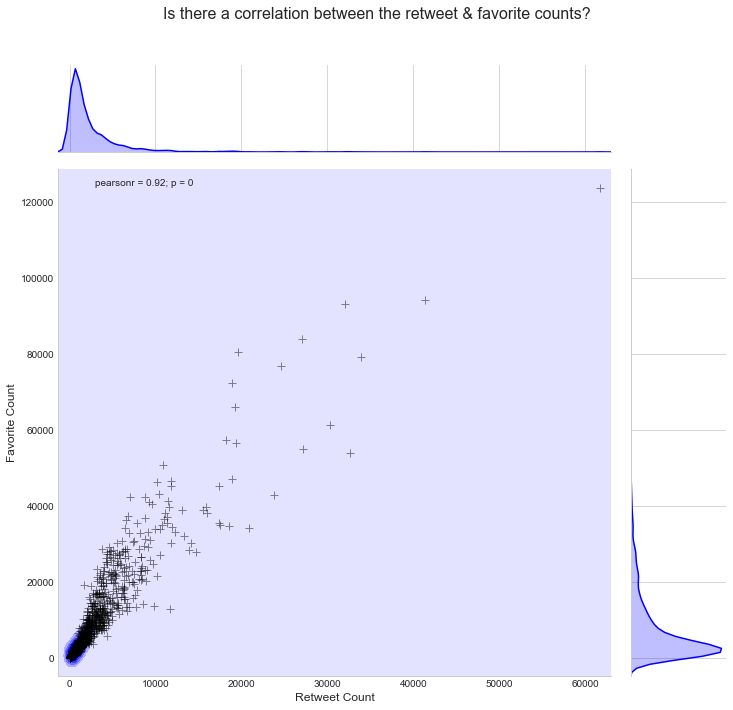

In [97]:
#Visualization comparing the favorite & retweet counts
sns.set_style('whitegrid')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_master, 
                  color="blue",
                  kind="kde", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.45)
g.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)

g.fig.subplots_adjust(top=0.9)
plt.suptitle('Is there a correlation between the retweet & favorite counts?',
                 fontsize=16)

## References:

- https://gwu-libraries.github.io/sfm-ui/posts/2016-11-10-twitter-interaction

- http://support.gnip.com/articles/identifying-and-understanding-retweets.html

- http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.read_json.html

- https://stackoverflow.com/questions/13707457/python-value-that-occurs-the-most-in-a-list

- https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe

- https://chrisalbon.com/python/pandas_join_merge_dataframe.html